# Практическая работа №2: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 0304 Гурьянов Савелий, Никитин Дмитрий. Вариант №4.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

* Среднее значение дискретного сигнала: $$ Mean(s2) = \frac{\sum_{k=0}^{N}{s_2(k)}}{N} $$
* Энергия: $$ E = \sum_{k=0}^{N}{s_2^2(k)} $$
* Средняя мощность: $$ P = \frac{E}{N} $$

## Постановка задачи
С помощью программных средств провести моделирование и анализ линейных комбинаций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.



## Выполнение работы

In [2]:
import math
from matplotlib import pyplot

PI = math.pi
Nb = 4
N = 30 + Nb % 5
a = (-1) ** Nb * (0.8 + 0.005 * (Nb % 20))
C = 1 + Nb % 5
w0 = PI / (6 + Nb % 5)
U = Nb
n0 = 3 + Nb % 5
n_imp = 5 + Nb % 5
B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5
w1 = PI / (4 + Nb % 5)
w2 = PI / (8 + Nb % 5)
w3 = PI / (16 + Nb % 5)
a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5

def plot(x, y):
    pyplot.stem(x, y)
    pyplot.show()

#### 1. Смоделировать прямоугольный дискретный импульс

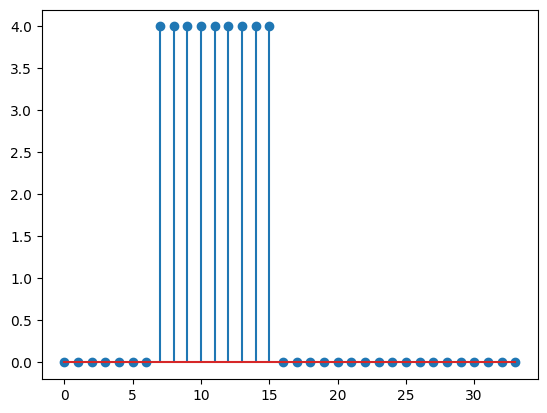

In [3]:

def single_hop(x):
    return int(x >= 0)

def s_1(k):
    return U * single_hop(k - n0) * single_hop(n0 + n_imp - 1 - k)


normalized_time = [i for i in range(N)]
normalized_time_impulse = [s_1(i) for i in normalized_time]

plot(normalized_time, normalized_time_impulse)


Моделирование импульса происходит с помощью произведения единичных скачков, взятых на границах [n0; +∞] и [-∞; n0+n_imp-1].

#### 2. Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k)$
$$s_2(k) = a_1x_1(k) + a_2x_2(k) + a_3x_3(k),$$
где
$$x_i(k) = B_isin(\widehat{\omega}_i k), \quad i = 1,2,3$$

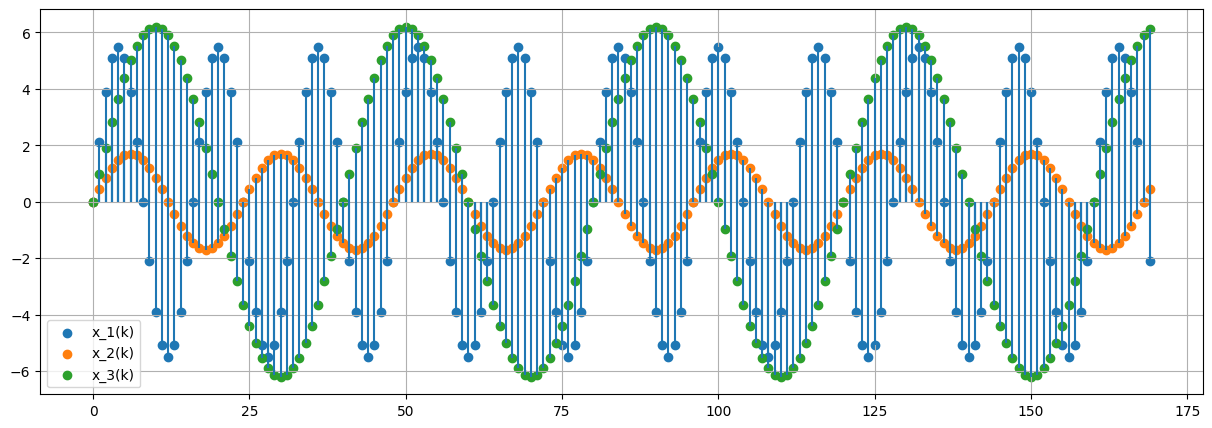

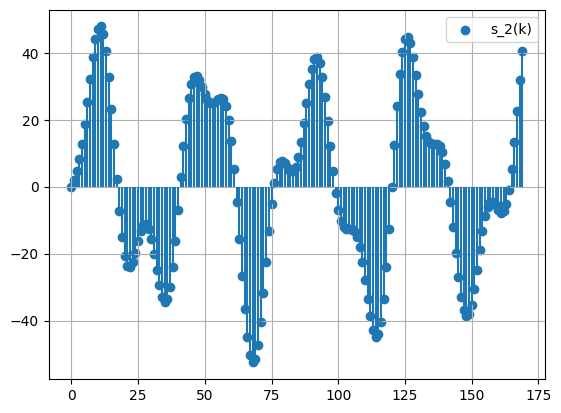

Mean_s2 = 0.789210650777783
E = 110847.78920679263
P = 655.904078146702


In [4]:
from math import sin
import numpy as np

def x_1(k):
    return B1*sin(w1 * k)

def x_2(k):
    return B2*sin(w2 * k)

def x_3(k):
    return B3*sin(w3 * k)

def s_2(k):
    return a1 * x_1(k) + a2 * x_2(k) + a3 * x_3(k)

normalized_time = [i for i in range(5*N)]
normalized_time_x_1 = [x_1(i) for i in normalized_time]
normalized_time_x_2 = [x_2(i) for i in normalized_time]
normalized_time_x_3 = [x_3(i) for i in normalized_time]
normalized_time_s_2 = [s_2(i) for i in normalized_time]

def plot(x, y, label):
    pyplot.scatter(x, y, label = label)
    pyplot.vlines(x, 0, y)

pyplot.figure(figsize=(15, 5))
plot(normalized_time, normalized_time_x_1, "x_1(k)")
plot(normalized_time, normalized_time_x_2, "x_2(k)")
plot(normalized_time, normalized_time_x_3, "x_3(k)")
pyplot.legend()
pyplot.grid()
pyplot.show()


plot(normalized_time, normalized_time_s_2, "s_2(k)")
pyplot.legend()
pyplot.grid()
pyplot.show()

mean_s2 = np.mean(normalized_time_s_2)
print("Mean_s2 =", mean_s2)
E = np.sum([i**2 for i in normalized_time_s_2])
print("E =", E)
P = E/(5*N - 1)
print("P =", P)

При моделировании линейной комбинации сигналов s2(k) используются операции суммирования и умножения: для получения сигналов x1(k), x2(k), x3(k) используется умножение Bi на sin(wi*k), где i = 1, 2, 3, для получения общего сигнала используется суммирование сигналов xi(k). Таким образом, для получения s2(k) применяется линейная комбинация дискретных гармонических сигналов.
* Среднее значение дискретного сигнала: $$ Mean(s2) = \frac{\sum_{k=0}^{5N-1}{s_2(k)}}{5N-1} $$
* Энергия: $$ E = \sum_{k=0}^{5N-1}{s_2^2(k)} $$
* Средняя мощность: $$ P = \frac{E}{5N-1} $$

#### 3. Смоделировать дискретный гармонический сигнал $s_3(k)$ и отобразить его огибающую $|a|^k$

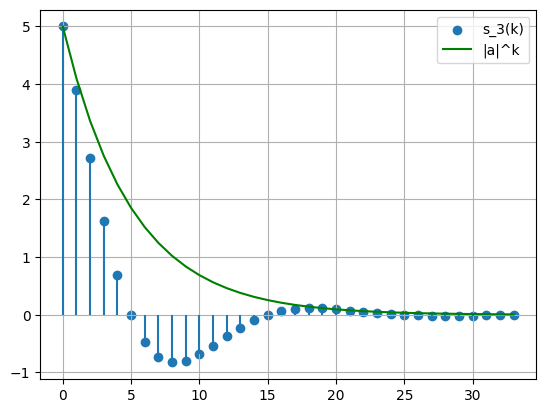

In [5]:
from math import cos

def s_3(k):
    # phong bì - огибающая сигнала
    phong_bì = abs(a)**k * C
    return phong_bì * cos(w0 * k)

normalized_time = [i for i in range(N)]
normalized_time_s_3 = [s_3(i) for i in normalized_time]
normalized_time_a = [C * abs(a)**i for i in normalized_time]

def plot(x, y, label):
    pyplot.scatter(x, y, label = label)
    pyplot.vlines(x, 0, y)
    
plot(normalized_time, normalized_time_s_3, label="s_3(k)")
pyplot.plot(normalized_time_a, color="green", label="|a|^k")
pyplot.legend()
pyplot.grid()
pyplot.show()

Гармонический сигнал $C cos (\widehat{\omega}_0 k)$ умножается на огибающую $|a|^k$, благодаря чему получается формула сигнала s3:
$$s_3(k) = C cos(\widehat{\omega}_0 k) |a|^k$$

#### 4. Вывести график пяти периодов периодической последовательности $s_4(k)$
Для моделирования $s_4(k)$ использовалось взятие k по модулю периода T:
$$s_4(k) = {s_1(k\bmod T)} $$

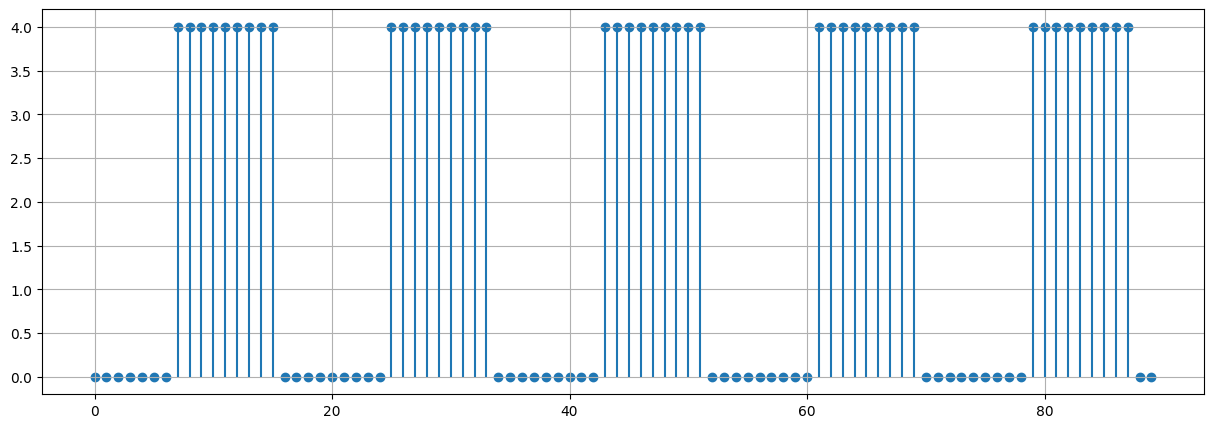

In [6]:
T = 2 * n_imp
def s_4(k, T=2 * n_imp):
    return s_1(k % T)

normalized_time = [i for i in range(5 * T)]
normalized_time_s_4 = [s_4(i) for i in normalized_time]

pyplot.figure(figsize=(15, 5))
pyplot.scatter(normalized_time, normalized_time_s_4)
pyplot.vlines(normalized_time, 0, normalized_time_s_4)
pyplot.grid()
pyplot.show()

## Выводы
В ходе выполнения практической работы были выполнены моделирование и анализ линейных комбинаций дискретных сигналов. Построены графики смоделированных сигналов, выполнен анализ их формирования на примере дискретного прямоугольного импульса, линейной комбинации дискретных гармонических сигналов, дискретного гармонического сигнала с экспоненциальной огибающей и сигнала, состоящего из пяти периодов периодической последовательности дискретных прямоугольных импульсов амплитуды и длительности с периодом, вдвое большим длительности импульса.